# Data Analysis on Collected Data

## NOTE: This file depends on the output of the FLOW1 and FLOW2 notebooks

In [1]:
import pandas as pd
import pickle
import numpy as np
import itertools
import datetime

# Stats libraries
from tableone import TableOne
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
# Image libraries
# https://jakevdp.github.io/pdvega/
# jupyter nbextension enable vega3 --py --sys-prefix
import matplotlib.pyplot as plt
import pdvega 
%matplotlib inline

C:\Users\Reunion\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Load in previous data

In [2]:
data_sl = pickle.load(open("d_slices_5060_g.p","rb"))

In [3]:
data_mro = pickle.load(open("d_mro_5060_g.p","rb"))

In [4]:
data_tot_tests = pickle.load(open("total_lab_tests_5050_g.p","rb"))

In [ ]:
# create a pandas series from the imported list of series
data_sl = pd.concat(data_sl)

In [6]:
RN_np = []
RN_nm = []
OTH_np = []
OTH_nm = [] 
MDs_np = []
MDs_nm = []
RO_np = []
RO_nm = []
total_l = []
PersonTot=[]
EffcacyAve=[]
for s in data_sl:
    RN_np.append(s[0]['RN'][0])  
    OTH_np.append(s[0]['OTH'][0])
    MDs_np.append(s[0]['MDs'][0]) 
    RO_np.append(s[0]['RO'][0])
    RN_nm.append(s[0]['RN'][1])  
    OTH_nm.append(s[0]['OTH'][1])
    MDs_nm.append(s[0]['MDs'][1]) 
    RO_nm.append(s[0]['RO'][1])
    total_l.append(s[1])
    PersonTot.append(s[0]['RN'][0]+s[0]['OTH'][0]+s[0]['MDs'][0]+s[0]['RO'][0])
    if s[0]['RN'][0]+s[0]['OTH'][0]+s[0]['MDs'][0]+s[0]['RO'][0]==0:
        EffcacyAve.append(0)
    else:
        EffcacyAve.append(int(s[1])/int((s[0]['RN'][0]+s[0]['OTH'][0]+s[0]['MDs'][0]+s[0]['RO'][0])))

In [7]:
s[0]['RN'][0]+s[0]['OTH'][0]+s[0]['MDs'][0]+s[0]['RO'][0]

18

In [8]:
data_mro_plus = data_mro

In [9]:
data_mro_plus["RN_np"] = RN_np
data_mro_plus["RN_nm"] = RN_nm
data_mro_plus["RO_np"] = RO_np
data_mro_plus["RO_nm"] = RO_nm
data_mro_plus["MDs_nm"] = MDs_nm
data_mro_plus["MDs_np"] = MDs_np
data_mro_plus["OTH_nm"] = OTH_nm
data_mro_plus["OTH_np"] = OTH_np
data_mro_plus["MeasTot"] = total_l
data_mro_plus["PersonTot"] = PersonTot
data_mro_plus["EffcacyAve"] = EffcacyAve
data_mro_plus["TotalTests"] = data_tot_tests

In [10]:
data_mro_plus.head()

,subject_id,hadm_id,icustay_id,gender,admittime_hospital,dischtime_hospital,los_hospital,age,admission_type,hospital_expire_flag,...,RO_np,RO_nm,MDs_nm,MDs_np,OTH_nm,OTH_np,MeasTot,PersonTot,EffcacyAve,TotalTests
0,285,165312,238023,M,2152-09-21 22:47:00,2152-10-20 15:19:00,28.6889,45.3561,EMERGENCY,0,...,0,0,0,0,11014,40,45849,70,654.985714,1296
1,293,125963,263651,F,2125-02-09 07:15:00,2125-02-13 13:45:00,4.2708,46.9889,ELECTIVE,0,...,0,0,0,0,487,5,1573,10,157.300000,138
2,310,142159,269885,M,2139-05-06 13:15:00,2139-05-10 12:00:00,3.9479,42.8033,ELECTIVE,0,...,0,0,0,0,83,3,2515,9,279.444444,57
3,319,124954,281554,F,2156-08-12 14:01:00,2156-08-16 17:52:00,4.1604,47.2634,EMERGENCY,0,...,0,0,0,0,81,4,2578,10,257.800000,31
4,326,188926,281585,M,2118-11-01 21:46:00,2118-11-05 14:19:00,3.6896,41.9747,EMERGENCY,0,...,0,0,0,0,503,8,4655,17,273.823529,103


In [11]:
data_mro_plus.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'gender', 'admittime_hospital',
       'dischtime_hospital', 'los_hospital', 'age', 'admission_type',
       'hospital_expire_flag', 'intime_icu', 'outtime_icu', 'los_icu',
       'hospstay_seq', 'icustay_seq', 'first_careunit', 'last_careunit',
       'first_wardid', 'last_wardid', 'icustay_expire_flag', 'oasis',
       'oasis_prob', 'RN_np', 'RN_nm', 'RO_np', 'RO_nm', 'MDs_nm', 'MDs_np',
       'OTH_nm', 'OTH_np', 'MeasTot', 'PersonTot', 'EffcacyAve', 'TotalTests'],
      dtype='object')

In [12]:
data_mro_plus.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,4224.0,36187.528172,29216.986238,4.000000,12690.750000,26038.500000,59153.250000,99991.000000
hadm_id,4224.0,150127.357955,28689.557169,100006.000000,125465.000000,150662.500000,174786.250000,199909.000000
icustay_id,4224.0,249774.937500,28724.427869,200003.000000,224759.000000,249288.000000,274999.250000,299999.000000
los_hospital,4224.0,10.348158,12.176025,-0.623600,3.594600,6.438200,11.954875,153.916000
age,4224.0,45.510359,2.844798,40.001700,43.175900,45.748150,47.998700,49.998200
hospital_expire_flag,4224.0,0.080966,0.272815,0.000000,0.000000,0.000000,0.000000,1.000000
los_icu,4224.0,4.111653,6.810130,0.004300,1.149375,2.006050,3.933000,153.928000
hospstay_seq,4224.0,1.092566,0.444080,1.000000,1.000000,1.000000,1.000000,11.000000
icustay_seq,4224.0,1.079545,0.335476,1.000000,1.000000,1.000000,1.000000,7.000000
first_wardid,4224.0,30.890388,17.994883,7.000000,14.000000,23.000000,52.000000,57.000000


In [13]:
data_mro_plus['admitday_hospital'] = data_mro_plus.admittime_hospital.dt.weekday_name
data_mro_plus['dischday_hospital'] = data_mro_plus.dischtime_hospital.dt.weekday_name
data_mro_plus['inday_icu'] = data_mro_plus.intime_icu.dt.weekday_name
data_mro_plus['inday_icu_seq'] = data_mro_plus.intime_icu.dt.weekday
data_mro_plus['outday_icu'] = data_mro_plus.outtime_icu.dt.weekday_name
data_mro_plus.head()

,subject_id,hadm_id,icustay_id,gender,admittime_hospital,dischtime_hospital,los_hospital,age,admission_type,hospital_expire_flag,...,OTH_np,MeasTot,PersonTot,EffcacyAve,TotalTests,admitday_hospital,dischday_hospital,inday_icu,inday_icu_seq,outday_icu
0,285,165312,238023,M,2152-09-21 22:47:00,2152-10-20 15:19:00,28.6889,45.3561,EMERGENCY,0,...,40,45849,70,654.985714,1296,Thursday,Friday,Thursday,3,Friday
1,293,125963,263651,F,2125-02-09 07:15:00,2125-02-13 13:45:00,4.2708,46.9889,ELECTIVE,0,...,5,1573,10,157.300000,138,Friday,Tuesday,Friday,4,Saturday
2,310,142159,269885,M,2139-05-06 13:15:00,2139-05-10 12:00:00,3.9479,42.8033,ELECTIVE,0,...,3,2515,9,279.444444,57,Wednesday,Sunday,Wednesday,2,Friday
3,319,124954,281554,F,2156-08-12 14:01:00,2156-08-16 17:52:00,4.1604,47.2634,EMERGENCY,0,...,4,2578,10,257.800000,31,Thursday,Monday,Thursday,3,Saturday
4,326,188926,281585,M,2118-11-01 21:46:00,2118-11-05 14:19:00,3.6896,41.9747,EMERGENCY,0,...,8,4655,17,273.823529,103,Tuesday,Saturday,Tuesday,1,Saturday


In [14]:
data_mro_plus['inday_icu'].value_counts()

Wednesday    681
Monday       679
Tuesday      652
Friday       626
Thursday     601
Saturday     507
Sunday       478
Name: inday_icu, dtype: int64

In [15]:
# create weekday vs weekend column for icu_intime 
data_mro_plus['inday_icu_wkd'] = np.where(data_mro_plus.intime_icu.dt.weekday <= 4, 
                                 'weekday','weekend')
data_mro_plus['inday_icu_wkd'].value_counts()

weekday    3239
weekend     985
Name: inday_icu_wkd, dtype: int64

In [16]:
data_mro_plus.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'gender', 'admittime_hospital',
       'dischtime_hospital', 'los_hospital', 'age', 'admission_type',
       'hospital_expire_flag', 'intime_icu', 'outtime_icu', 'los_icu',
       'hospstay_seq', 'icustay_seq', 'first_careunit', 'last_careunit',
       'first_wardid', 'last_wardid', 'icustay_expire_flag', 'oasis',
       'oasis_prob', 'RN_np', 'RN_nm', 'RO_np', 'RO_nm', 'MDs_nm', 'MDs_np',
       'OTH_nm', 'OTH_np', 'MeasTot', 'PersonTot', 'EffcacyAve', 'TotalTests',
       'admitday_hospital', 'dischday_hospital', 'inday_icu', 'inday_icu_seq',
       'outday_icu', 'inday_icu_wkd'],
      dtype='object')

In [17]:
columns = ['gender', 'los_hospital', 'age', 'admission_type', 'hospital_expire_flag', 
           'los_icu','icustay_expire_flag', 'oasis', 'oasis_prob', 'first_careunit',
           'inday_icu_wkd', 'MeasTot','PersonTot','EffcacyAve','TotalTests']

groupby = 'admission_type'

pval = False

categorical = ['gender','admission_type','hospital_expire_flag','icustay_expire_flag',
               'first_careunit','inday_icu_wkd','last_careunit']

t = TableOne(data_mro_plus, columns=columns, categorical=categorical, groupby=groupby, pval=pval)
t.tableone

Grouped by admission_type                      \
                                                ELECTIVE           EMERGENCY   
variable             level                                                     
n                                                    637                3472   
EffcacyAve                               278.15 (134.61)     280.58 (176.35)   
MeasTot                                3692.40 (6826.53)  5543.47 (10611.28)   
PersonTot                                   11.12 (8.86)       14.40 (13.52)   
TotalTests                               177.59 (326.27)     260.60 (511.41)   
admission_type       ELECTIVE                637 (100.0)                       
                     EMERGENCY                                  3472 (100.0)   
                     URGENT                                                    
age                                         45.79 (2.91)        45.46 (2.83)   
first_careunit       CCU                        21 (3.3)         430 (12.38)   
                     CSRU                    281 (44.11)          304 (8.76)   
                     MICU                     98 (15.38)        1498 (43.15)   
                     SICU                    168 (26.37)         650 (18.72)   
                     TSICU                    69 (10.83)         590 (16.99)   
gender               F                       297 (46.62)        1318 (37.96)   
                     M                       340 (53.38)        2154 (62.04)   
hospital_expire_flag 0                       626 (98.27)        3155 (90.87)   
                     1                         11 (1.73)          317 (9.13)   
icustay_expire_flag  0                       627 (98.43)        3216 (92.63)   
                     1                         10 (1.57)          256 (7.37)   
inday_icu_wkd        weekday                 612 (96.08)        2578 (74.25)   
                     weekend                   25 (3.92)         894 (25.75)   
last_careunit        CCU                       25 (3.92)         393 (11.32)   
                     CSRU                    275 (43.17)           302 (8.7)   
                     MICU                     98 (15.38)        1532 (44.12)   
                     SICU                    173 (27.16)         683 (19.67)   
                     TSICU                    66 (10.36)         562 (16.19)   
los_hospital                                 8.71 (9.61)       10.66 (12.63)   
los_icu                                      2.85 (4.46)         4.32 (7.11)   
oasis                                       22.37 (8.08)        28.37 (8.42)   
oasis_prob                                   0.05 (0.07)         0.11 (0.12)   

                                                          
                                           URGENT isnull  
variable             level                                
n                                             115         
EffcacyAve                        278.84 (194.40)      0  
MeasTot                         5384.95 (8951.24)      0  
PersonTot                           13.73 (11.65)      0  
TotalTests                        309.26 (498.04)      0  
admission_type       ELECTIVE                          0  
                     EMERGENCY                            
                     URGENT           115 (100.0)         
age                                  45.53 (2.81)      0  
first_careunit       CCU               38 (33.04)      0  
                     CSRU              15 (13.04)         
                     MICU              42 (36.52)         
                     SICU              17 (14.78)         
                     TSICU               3 (2.61)         
gender               F                 48 (41.74)      0  
                     M                 67 (58.26)         
hospital_expire_flag 0                101 (87.83)      0  
                     1                 14 (12.17)         
icustay_expire_flag  0                104 (90.43)      0  
            

In [40]:
columns = ['gender', 'age', 'hospital_expire_flag', 
           'icustay_expire_flag',
           'inday_icu_wkd']

groupby = 'admission_type'

pval = False

categorical = ['gender','hospital_expire_flag','icustay_expire_flag'
               ,'inday_icu_wkd']

t = TableOne(data_mro_plus, columns=columns, categorical=categorical, groupby=groupby, pval=pval)
t.tableone

Grouped by admission_type                \
                                              ELECTIVE     EMERGENCY   
variable             level                                             
n                                                  637          3472   
age                                       45.79 (2.91)  45.46 (2.83)   
gender               F                     297 (46.62)  1318 (37.96)   
                     M                     340 (53.38)  2154 (62.04)   
hospital_expire_flag 0                     626 (98.27)  3155 (90.87)   
                     1                       11 (1.73)    317 (9.13)   
icustay_expire_flag  0                     627 (98.43)  3216 (92.63)   
                     1                       10 (1.57)    256 (7.37)   
inday_icu_wkd        weekday               612 (96.08)  2578 (74.25)   
                     weekend                 25 (3.92)   894 (25.75)   

                                                   
                                    URGENT isnull  
variable             level                         
n                                      115         
age                           45.53 (2.81)      0  
gender               F          48 (41.74)      0  
                     M          67 (58.26)         
hospital_expire_flag 0         101 (87.83)      0  
                     1          14 (12.17)         
icustay_expire_flag  0         104 (90.43)      0  
                     1           11 (9.57)         
inday_icu_wkd        weekday    49 (42.61)      0  
                     weekend    66 (57.39)

In [19]:
columns = ['gender', 'los_hospital', 'age', 'admission_type', 'hospital_expire_flag', 
           'los_icu','icustay_expire_flag', 'oasis', 'oasis_prob', 'first_careunit',
           'inday_icu_wkd', 'MeasTot','PersonTot','EffcacyAve','TotalTests']

groupby = 'inday_icu_wkd'

pval = False

categorical = ['gender','admission_type','hospital_expire_flag','icustay_expire_flag',
               'first_careunit','inday_icu_wkd','last_careunit']

t = TableOne(data_mro_plus, columns=columns, categorical=categorical, groupby=groupby, pval=pval)
t.tableone

Grouped by inday_icu_wkd                      \
                                                 isnull             weekday   
variable             level                                                    
n                                                                      3239   
EffcacyAve                                            0     280.07 (171.46)   
MeasTot                                               0  5176.39 (10139.33)   
PersonTot                                             0       13.72 (12.56)   
TotalTests                                            0     246.75 (491.55)   
admission_type       ELECTIVE                         0         612 (18.89)   
                     EMERGENCY                                 2578 (79.59)   
                     URGENT                                       49 (1.51)   
age                                                   0        45.54 (2.86)   
first_careunit       CCU                              0         362 (11.18)   
                     CSRU                                        557 (17.2)   
                     MICU                                      1190 (36.74)   
                     SICU                                       662 (20.44)   
                     TSICU                                      468 (14.45)   
gender               F                                0        1292 (39.89)   
                     M                                         1947 (60.11)   
hospital_expire_flag 0                                0        2987 (92.22)   
                     1                                           252 (7.78)   
icustay_expire_flag  0                                0        3031 (93.58)   
                     1                                           208 (6.42)   
inday_icu_wkd        weekday                          0        3239 (100.0)   
                     weekend                                                  
last_careunit        CCU                              0         332 (10.25)   
                     CSRU                                       553 (17.07)   
                     MICU                                       1208 (37.3)   
                     SICU                                       695 (21.46)   
                     TSICU                                      451 (13.92)   
los_hospital                                          0       10.37 (12.21)   
los_icu                                               0         4.03 (6.81)   
oasis                                                 0        27.23 (8.67)   
oasis_prob                                            0         0.10 (0.11)   

                                                    
                                           weekend  
variable             level                          
n                                              985  
EffcacyAve                         280.49 (170.46)  
MeasTot                         5534.93 (10003.47)  
PersonTot                            14.44 (14.06)  
TotalTests                         258.13 (478.66)  
admission_type       ELECTIVE            25 (2.54)  
                     EMERGENCY         894 (90.76)  
                     URGENT               66 (6.7)  
age                                   45.42 (2.78)  
first_careunit       CCU               127 (12.89)  
                     CSRU                43 (4.37)  
                     MICU              448 (45.48)  
                     SICU              173 (17.56)  
                     TSICU              194 (19.7)  
gender               F                 371 (37.66)  
                     M                 614 (62.34)  
hospital_expire_flag 0                 895 (90.86)  
                     1                   90 (9.14)  
icustay_expire_flag  0                 916 (92.99)  
                     1                   69 (7.01)  
inday_icu_wkd        weekday                        
                     weekend           985 (100.0)  
last_careunit      

In [20]:
# Pivot data to summarise by day
dat_dow = data_mro_plus.groupby(['admission_type',
                        'inday_icu_seq'])['PersonTot'].mean().reset_index()

dat_dow = dat_dow.pivot(index='inday_icu_seq', 
                        columns='admission_type', values='PersonTot')

dat_dow

admission_type,ELECTIVE,EMERGENCY,URGENT
inday_icu_seq,,,
0,10.933333,13.990602,15.833333
1,10.948905,14.701789,13.250000
2,10.517730,14.994340,17.100000
3,11.989011,14.272908,8.750000
4,10.842593,13.902153,11.285714
5,15.187500,14.187082,11.666667
6,13.222222,14.779775,17.500000


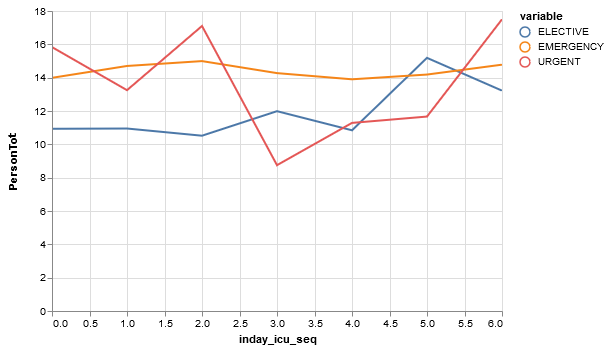

In [21]:
# day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
dat_dow.vgplot.line(value_name='PersonTot')

In [22]:
# Pivot data to summarise by day
dat_dow = data_mro_plus.groupby(['admission_type',
                        'inday_icu_seq'])['TotalTests'].mean().reset_index()

dat_dow = dat_dow.pivot(index='inday_icu_seq', 
                        columns='admission_type', values='TotalTests')

dat_dow

admission_type,ELECTIVE,EMERGENCY,URGENT
inday_icu_seq,,,
0,170.214815,236.577068,291.416667
1,172.474453,260.375746,247.916667
2,147.304965,282.777358,399.700000
3,215.285714,277.509960,100.750000
4,188.851852,259.479452,282.714286
5,288.250000,247.587973,263.071429
6,127.666667,258.462921,469.250000


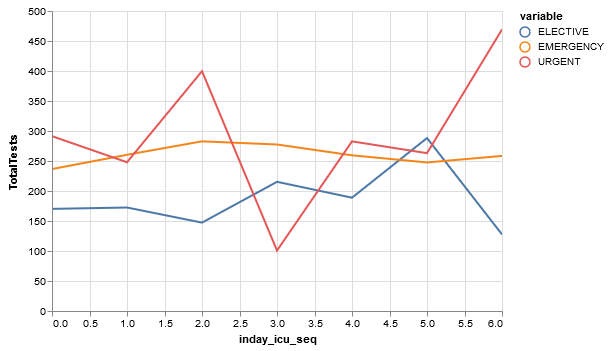

In [23]:
# day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
dat_dow.vgplot.line(value_name='TotalTests')

In [24]:
# Pivot data to summarise by day
dat_dow = data_mro_plus.groupby(['admission_type',
                        'inday_icu_seq'])['MeasTot'].mean().reset_index()

dat_dow = dat_dow.pivot(index='inday_icu_seq', 
                        columns='admission_type', values='MeasTot')

dat_dow

admission_type,ELECTIVE,EMERGENCY,URGENT
inday_icu_seq,,,
0,3406.725926,5100.018797,5476.083333
1,3490.846715,5464.242545,4884.750000
2,3109.404255,5916.045283,7386.300000
3,4554.637363,5689.342629,1317.375000
4,4045.370370,5566.651663,4545.571429
5,5877.625000,5500.276169,4196.166667
6,3340.555556,5571.822472,8436.625000


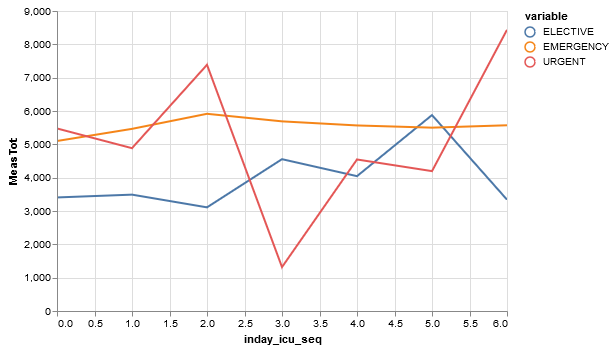

In [25]:
# day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
dat_dow.vgplot.line(value_name='MeasTot')

In [26]:
# Pivot data to summarise by day
dat_dow = data_mro_plus.groupby(['admission_type',
                        'inday_icu_seq'])['EffcacyAve'].mean().reset_index()

dat_dow = dat_dow.pivot(index='inday_icu_seq', 
                        columns='admission_type', values='EffcacyAve')

dat_dow

admission_type,ELECTIVE,EMERGENCY,URGENT
inday_icu_seq,,,
0,274.465642,274.539758,296.134512
1,283.820377,276.293672,264.992691
2,262.591037,275.992546,314.084637
3,289.005574,281.957893,153.041477
4,287.783260,295.152676,288.663276
5,304.376487,286.993642,273.660599
6,218.829406,273.342011,310.569987


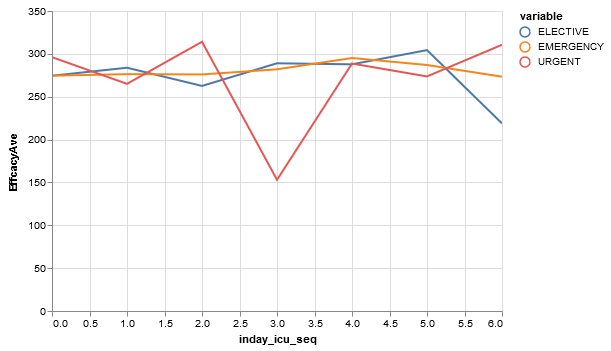

In [27]:
# day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
dat_dow.vgplot.line(value_name='EffcacyAve')

In [28]:


# Pivot data to summarise by day
dat_dow = data_mro_plus.groupby(['admission_type',
                        'inday_icu_seq'])['hospital_expire_flag'].mean().reset_index()

dat_dow = dat_dow.pivot(index='inday_icu_seq', 
                        columns='admission_type', values='hospital_expire_flag')

dat_dow



admission_type,ELECTIVE,EMERGENCY,URGENT
inday_icu_seq,,,
0,0.014815,0.069549,0.250000
1,0.000000,0.093439,0.000000
2,0.021277,0.107547,0.100000
3,0.000000,0.115538,0.000000
4,0.027778,0.080235,0.000000
5,0.125000,0.073497,0.166667
6,0.111111,0.098876,0.125000


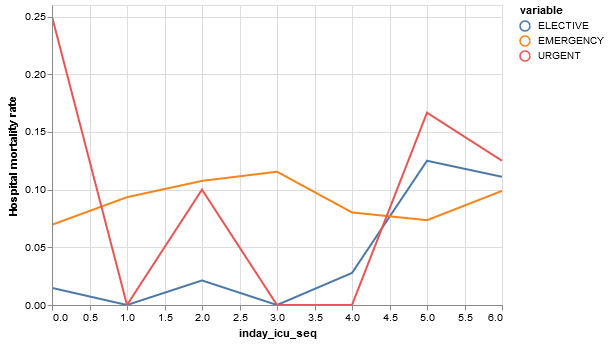

In [29]:
# day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
dat_dow.vgplot.line(value_name='Hospital mortality rate')

In [30]:
# R style syntax
simple_glm = smf.glm('hospital_expire_flag ~ C(inday_icu_wkd)', 
                     data=data_mro_plus, family=sm.families.Binomial()).fit()
simple_glm.summary2()

# Alternative syntax
# y = data.hospital_expire_flag
# X = sm.tools.add_constant(data.inday_icu_wkd.factorize()[0])
# simple_glm = sm.GLM(y, X, family=sm.families.Binomial()).fit()
# simple_glm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Generalized linear model
============================================================================
Model:                  GLM                    AIC:              2377.0983  
Link Function:          logit                  BIC:              -32874.4283
Dependent Variable:     hospital_expire_flag   Log-Likelihood:   -1186.5    
Date:                   2018-03-07 01:59       LL-Null:          -1187.5    
No. Observations:       4224                   Deviance:         2373.1     
Df Model:               1                      Pearson chi2:     4.22e+03   
Df Residuals:           4222                   Scale:            1.0000     
Method:                 IRLS                                                
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Intercept                   -2.4726   0.0656 -37.6934 0.0000 -2.6012 -2.3440
C(inday_icu_wkd)[T.weekend]  0.1756   0.1286   1.3656 0.1721 -0.0764  0.4276
============================================================================

"""

In [31]:
# Without effect modification
adj_glm = smf.glm('hospital_expire_flag ~ C(inday_icu_wkd) + C(admission_type)', 
                     data=data_mro_plus, family=sm.families.Binomial()).fit()
adj_glm.summary2()
# drop1(adj.glm,test="Chisq")

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Generalized linear model
===============================================================================
Model:                   GLM                     AIC:               2325.9568  
Link Function:           logit                   BIC:               -32912.8728
Dependent Variable:      hospital_expire_flag    Log-Likelihood:    -1159.0    
Date:                    2018-03-07 01:59        LL-Null:           -1187.5    
No. Observations:        4224                    Deviance:          2318.0     
Df Model:                3                       Pearson chi2:      4.22e+03   
Df Residuals:            4220                    Scale:             1.0000     
Method:                  IRLS                                                  
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                      -4.0414   0.3042 -13.2857 0.0000 -4.6376 -3.4452
C(inday_icu_wkd)[T.weekend]    -0.0015   0.1308  -0.0118 0.9906 -0.2579  0.2548
C(admission_type)[T.EMERGENCY]  1.7440   0.3111   5.6055 0.0000  1.1342  2.3537
C(admission_type)[T.URGENT]     2.0662   0.4228   4.8875 0.0000  1.2376  2.8948
===============================================================================

"""

In [32]:
# With effect modification
adj_glm_int = smf.glm('hospital_expire_flag ~ C(inday_icu_wkd) * C(admission_type)', 
                     data=data_mro_plus, family=sm.families.Binomial()).fit()
adj_glm_int.summary2()
# drop1(adj.glm,test="Chisq")

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Generalized linear model
===========================================================================================================
Model:                           GLM                               AIC:                         2320.7633  
Link Function:                   logit                             BIC:                         -32905.3692
Dependent Variable:              hospital_expire_flag              Log-Likelihood:              -1154.4    
Date:                            2018-03-07 01:59                  LL-Null:                     -1187.5    
No. Observations:                4224                              Deviance:                    2308.8     
Df Model:                        5                                 Pearson chi2:                4.22e+03   
Df Residuals:                    4218                              Scale:                       1.0000     
Method:                          IRLS                                                                      
-----------------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                                  -4.3241   0.3559 -12.1503 0.0000 -5.0217 -3.6266
C(inday_icu_wkd)[T.weekend]                                 2.3317   0.7109   3.2797 0.0010  0.9383  3.7251
C(admission_type)[T.EMERGENCY]                              2.0477   0.3623   5.6522 0.0000  1.3377  2.7578
C(admission_type)[T.URGENT]                                 1.9038   0.6316   3.0143 0.0026  0.6659  3.1416
C(inday_icu_wkd)[T.weekend]:C(admission_type)[T.EMERGENCY] -2.4171   0.7241  -3.3383 0.0008 -3.8362 -0.9980
C(inday_icu_wkd)[T.weekend]:C(admission_type)[T.URGENT]    -1.6341   0.9463  -1.7268 0.0842 -3.4889  0.2207
===========================================================================================================

"""

In [33]:
# Create data structure to hold odds of hospital death
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

weekend_grid = expand_grid({'inday_icu_wkd': ['weekday', 'weekend'],
                            'admission_type': ['ELECTIVE', 'EMERGENCY', 'URGENT']})

weekend_grid

,inday_icu_wkd,admission_type
0,weekday,ELECTIVE
1,weekday,EMERGENCY
2,weekday,URGENT
3,weekend,ELECTIVE
4,weekend,EMERGENCY
5,weekend,URGENT


In [34]:
def prob2logodds(prob):
    odds = prob / (1 - prob)
    logodds = np.log(odds)
    return logodds

In [35]:
weekend_grid['predict'] = adj_glm_int.predict(weekend_grid[['inday_icu_wkd','admission_type']])
weekend_grid['log_odds'] = prob2logodds(weekend_grid['predict'])
weekend_grid.set_index(['inday_icu_wkd','admission_type'], inplace=True)
weekend_grid

predict  log_odds
inday_icu_wkd admission_type                    
weekday       ELECTIVE        0.013072 -4.324133
              EMERGENCY       0.093095 -2.276412
              URGENT          0.081633 -2.420368
weekend       ELECTIVE        0.120000 -1.992430
              EMERGENCY       0.086130 -2.361834
              URGENT          0.151515 -1.722767

In [36]:
diff_grid = weekend_grid.loc['weekend']['log_odds'] - weekend_grid.loc['weekday']['log_odds']
np.exp(diff_grid)

admission_type
ELECTIVE     10.295455
EMERGENCY     0.918125
URGENT        2.008929
Name: log_odds, dtype: float64

In [37]:
writer = pd.ExcelWriter('mro_plus.xlsx')
data_mro_plus.to_excel(writer,'Sheet1')
writer.save()

In [38]:
from sklearn import tree
data_mro_plus.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'gender', 'admittime_hospital',
       'dischtime_hospital', 'los_hospital', 'age', 'admission_type',
       'hospital_expire_flag', 'intime_icu', 'outtime_icu', 'los_icu',
       'hospstay_seq', 'icustay_seq', 'first_careunit', 'last_careunit',
       'first_wardid', 'last_wardid', 'icustay_expire_flag', 'oasis',
       'oasis_prob', 'RN_np', 'RN_nm', 'RO_np', 'RO_nm', 'MDs_nm', 'MDs_np',
       'OTH_nm', 'OTH_np', 'MeasTot', 'PersonTot', 'EffcacyAve', 'TotalTests',
       'admitday_hospital', 'dischday_hospital', 'inday_icu', 'inday_icu_seq',
       'outday_icu', 'inday_icu_wkd'],
      dtype='object', name='variable')